In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading and preparing data 

In [2]:
#importing the mnist data set to run it through the neural network
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
#each image is a 28 x 28 pixel image
x_train[0].shape

(28, 28)

In [4]:
#the 2 dimensional array for the first element in the training batch
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

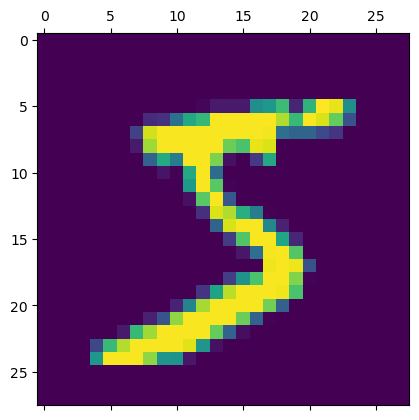

In [5]:
plt.matshow(x_train[0])

In [6]:
#each image has been labelled
y_train[0]

5

In [7]:
#scaling the matrices to improve model perfomance
x_train = x_train / 255
x_test = x_test / 255

In [8]:
#for each pixel in the image there will be a neuron to take care of it
#so the 2d array has to be flattened into a 1d array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [9]:
x_test_flattened.shape

(10000, 784)

In [10]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Creating a 1 layer neural network

In [11]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

2022-09-04 13:43:06.011270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-04 13:43:06.014841: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4695 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - accuracy: 0.9260


In [12]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2695 - accuracy: 0.9248


[0.26946747303009033, 0.9247999787330627]

In [13]:
#the values in the array are the scores for each one of the neurons in the output layer of the nn.
#so there will be 10 values in the array representing the activation score for the corresponding neuron
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.33052447e-02, 3.48107164e-07, 5.39456643e-02, 9.62574184e-01,
       4.61741863e-03, 1.14920780e-01, 2.98516011e-06, 9.99834180e-01,
       1.14602454e-01, 6.86096072e-01], dtype=float32)

In [14]:
#this numpy function returns the index of the maximum value in the array, this being the predicted number.
np.argmax(y_predicted[0])

7

In [15]:
#creating a new array with all the prediction outcomes to then make a confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [16]:
#building a confusion matrix to see how well the model works
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    1,    2,    0,    5,   14,    3,    2,    0],
       [   0, 1106,    3,    2,    0,    1,    4,    2,   17,    0],
       [   3,    7,  928,   16,    8,    4,   13,   12,   39,    2],
       [   2,    0,   22,  913,    0,   22,    4,   13,   27,    7],
       [   1,    1,    3,    1,  923,    0,   12,    4,    9,   28],
       [   8,    3,    3,   32,   11,  765,   18,    9,   36,    7],
       [   7,    3,    4,    1,    7,    9,  921,    2,    4,    0],
       [   1,    5,   23,    3,   10,    0,    0,  954,    3,   29],
       [   7,    5,    7,   18,    9,   19,   10,   13,  881,    5],
       [   9,    5,    1,   10,   33,    5,    1,   30,   11,  904]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

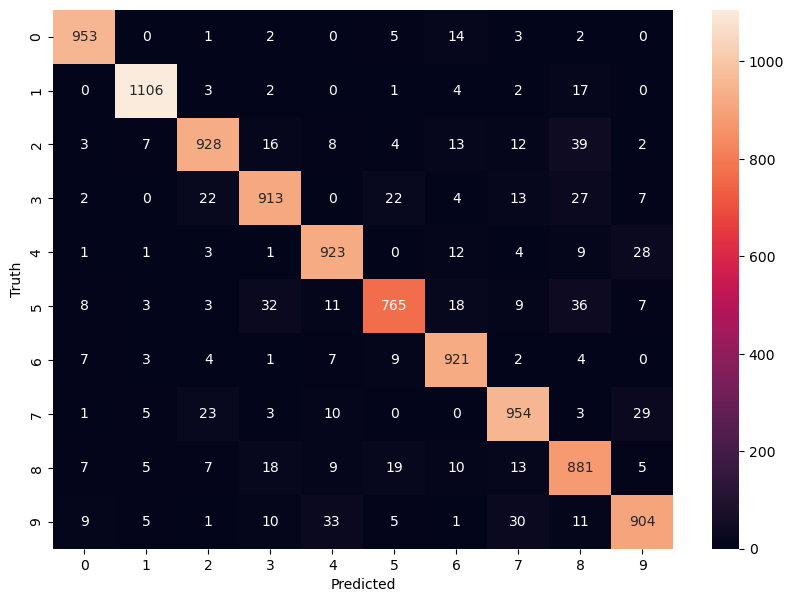

In [17]:
#using seaborn library to better visualize the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding a hidden layer to the neural network

### This will improve the models performance

In [18]:
#creating a simple nn
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
]) 

#choosing what loss function to optimize and what algorithm to use to do that
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#setting the number of training loops
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2739 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1264 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0877 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0671 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0537 - accuracy: 0.9837


In [19]:
#with just one more hidden layer the model has drastically improved its performance
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0812 - accuracy: 0.9763


[0.08118075877428055, 0.9763000011444092]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

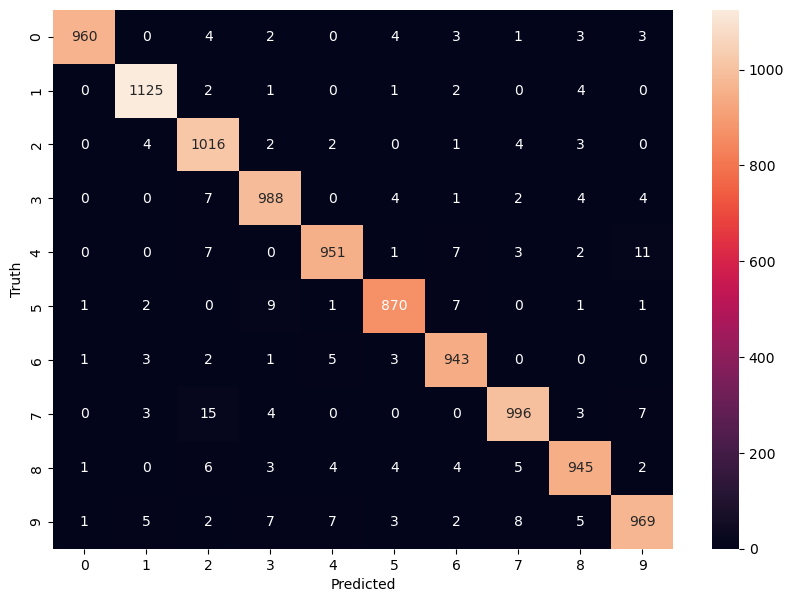

In [20]:
#replotting a confusion matrix for the new model
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#the model now shows a much higher accuracy predicting the right number